<a href="https://colab.research.google.com/github/aeshna25/Employees-Attrition-Predictive-Modeling-/blob/main/HR_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
employee_df = pd.read_csv('/content/drive/MyDrive/Data Science for Business Package/1. Human Resources Data/Human_Resources.csv')

## Understanding data

In [ ]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_df['Attrition']= employee_df['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['OverTime']= employee_df['OverTime'].apply(lambda x : 1 if x=='Yes' else 0)
employee_df['Over18']= employee_df['Over18'].apply(lambda x : 1 if x== 'Y' else 0)

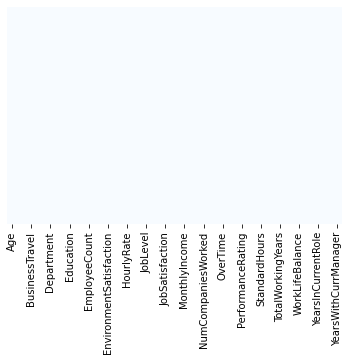

In [ ]:
#missing data
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

No missing data. Great!


## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9238ceab90>,
      dtype=object)

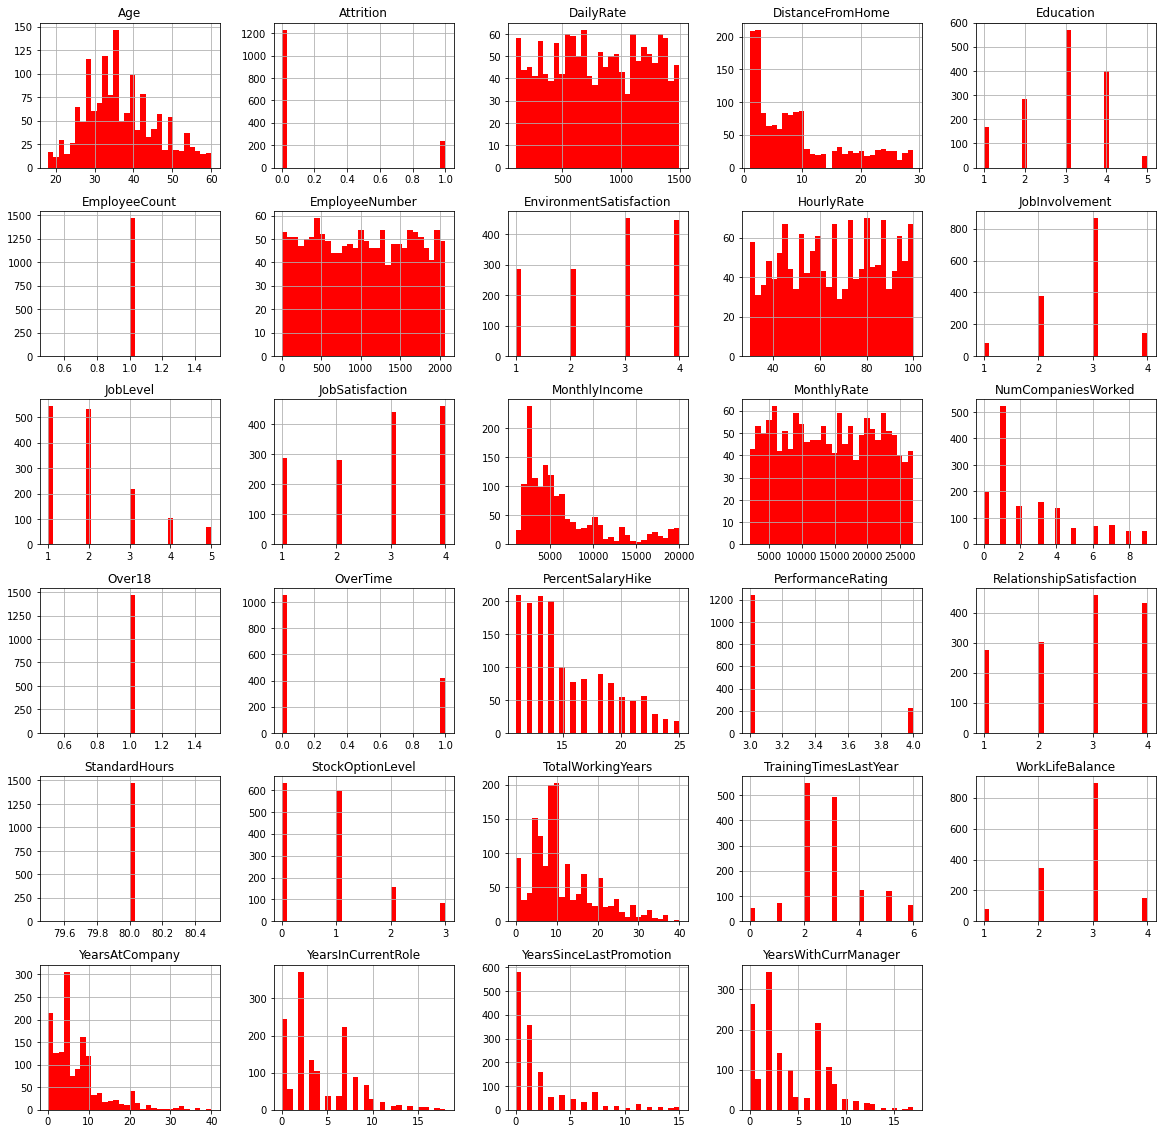

In [ ]:
#plotted all columns 
employee_df.hist(bins=30, color='r', figsize=(20,20))

1. EmployeeCount, Over18, StandardHours are constant and hence can be removed
2. EmployyeNumber is also not providing any information 
2. Monthly income and TotalWorkingYears are tail heavy.


In [ ]:
employee_df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis=1, inplace=True)

In [ ]:
# get insights from Attrition column 
left_df= employee_df[employee_df.Attrition==1]
stayed_df= employee_df[employee_df.Attrition==0]



#get % of left and stayed employees
print('Total Employees =', len(employee_df))
print('% of Employee who left the company = ',1*len(left_df)/len(employee_df)*100 ,'%')
print('% of Employee who stayed in the company = ',1*len(stayed_df)/len(employee_df)*100 ,'%')

Total Employees = 1470
% of Employee who left the company =  16.122448979591837 %
% of Employee who stayed in the company =  83.87755102040816 %


Comparing the left_df and stayed_df got to know
1. Mean age of employee who left the company was 33 , while who stayed had an avergae age of 37.
-> might imply, age is propotional to staying put.

2. Distance from home was on an averge less for staying employees
-> distance of the office might play a role in switching of jobs

3. Stock, income were comparitively low for leaving employees
4. Leaving employees had a higher avg overtime as compared to their counterparts
5. Job satisfaction, salary hike didn't play much role in deciding attrition

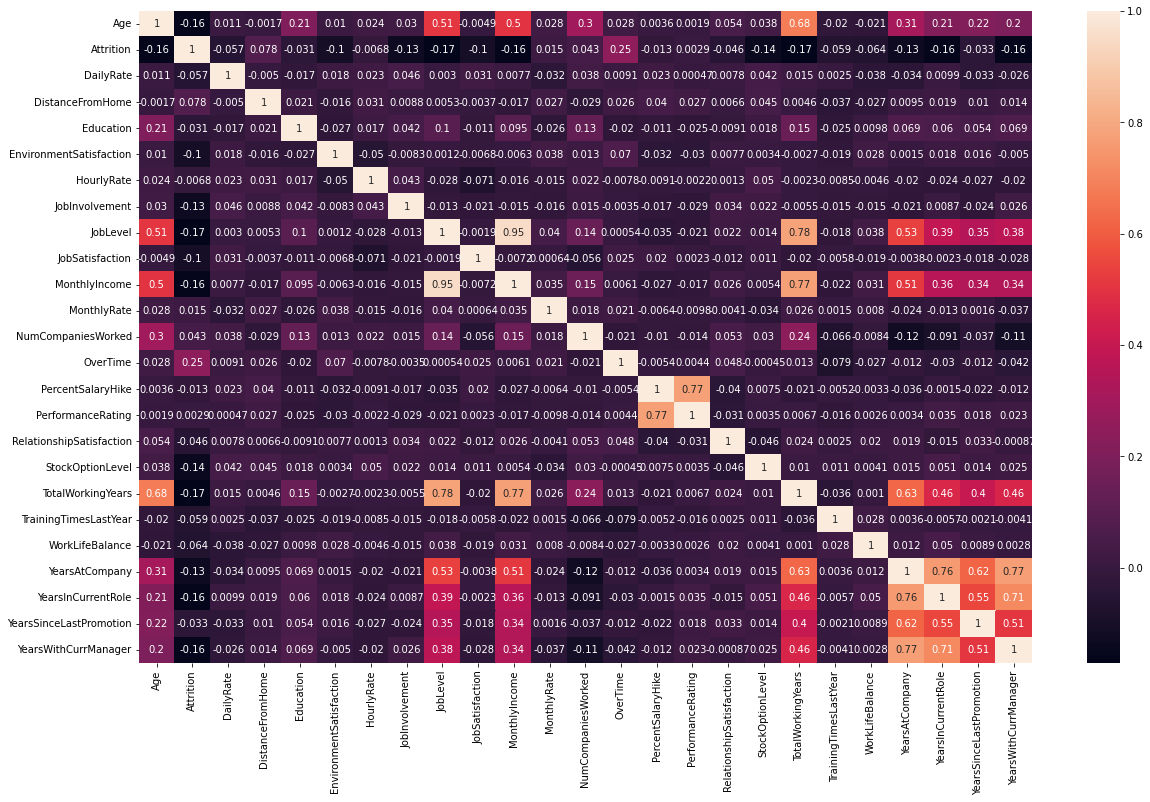

In [ ]:
# correlation b/w columns
correlation =employee_df.corr()
f,ax= plt.subplots(figsize=(20,12))
sns.heatmap(correlation, annot=True)

1. Age and monthly income are correlated
2. Job level and working years are positively correlated
3. Monthly income is correlated with the years in company
4. Job satisfaction doesn't have  high correlation with any factor
5. Years at company, role, manager, promotion is tighly correlated bunch

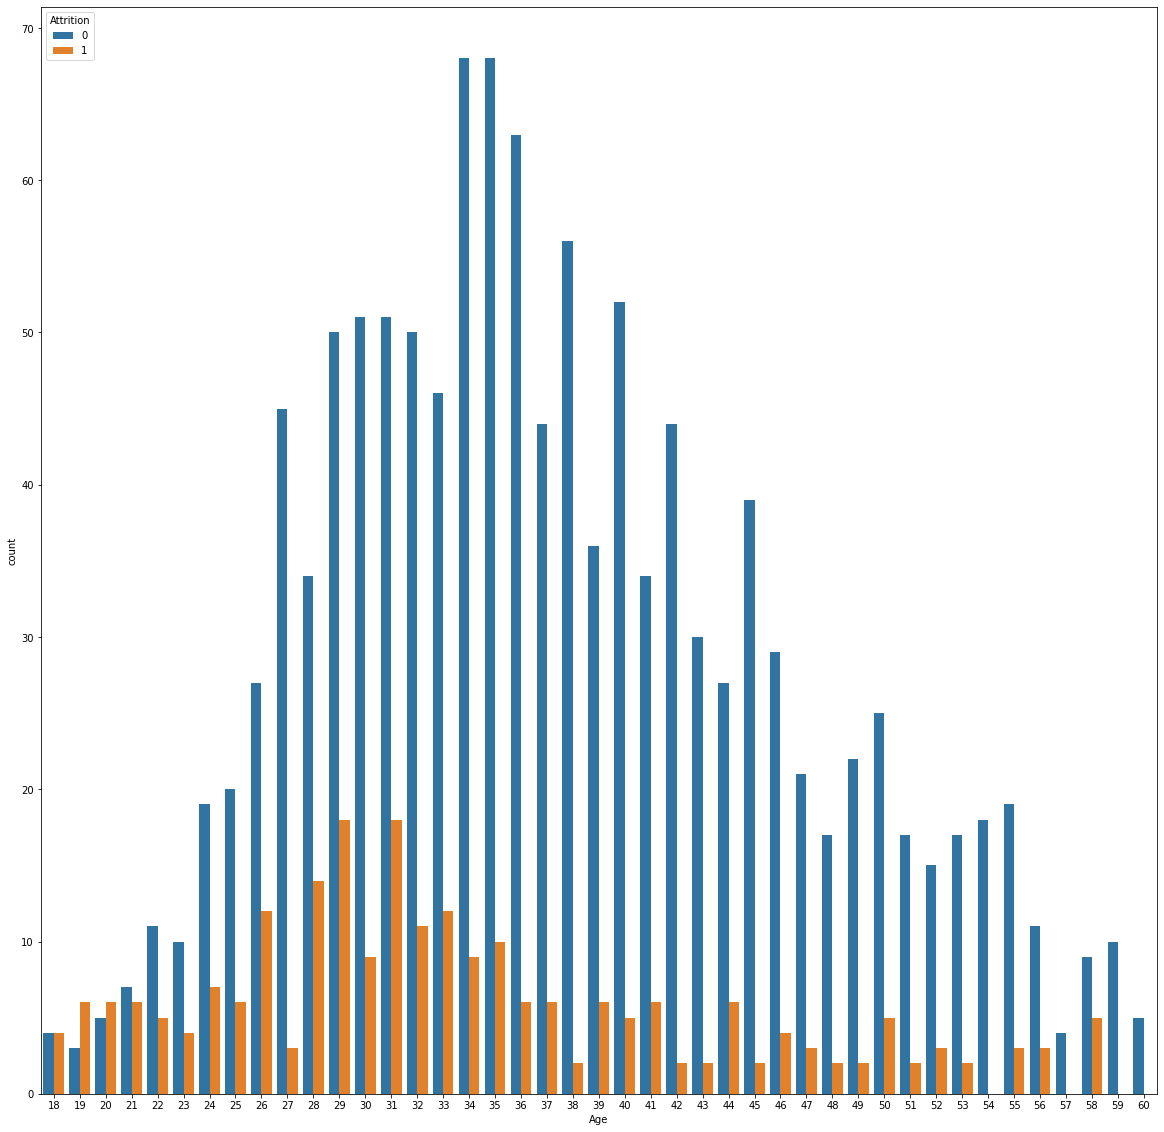

In [ ]:
# hypothesis: lesser age people are more prone to leave the company 
plt.figure(figsize=(20,20))
sns.countplot(x='Age',hue='Attrition',data= employee_df)

People in the age group of 26-31 have great flatuation, especially employees aged 26 and 31.
As the years increase the number of leaving employees see a downward trend

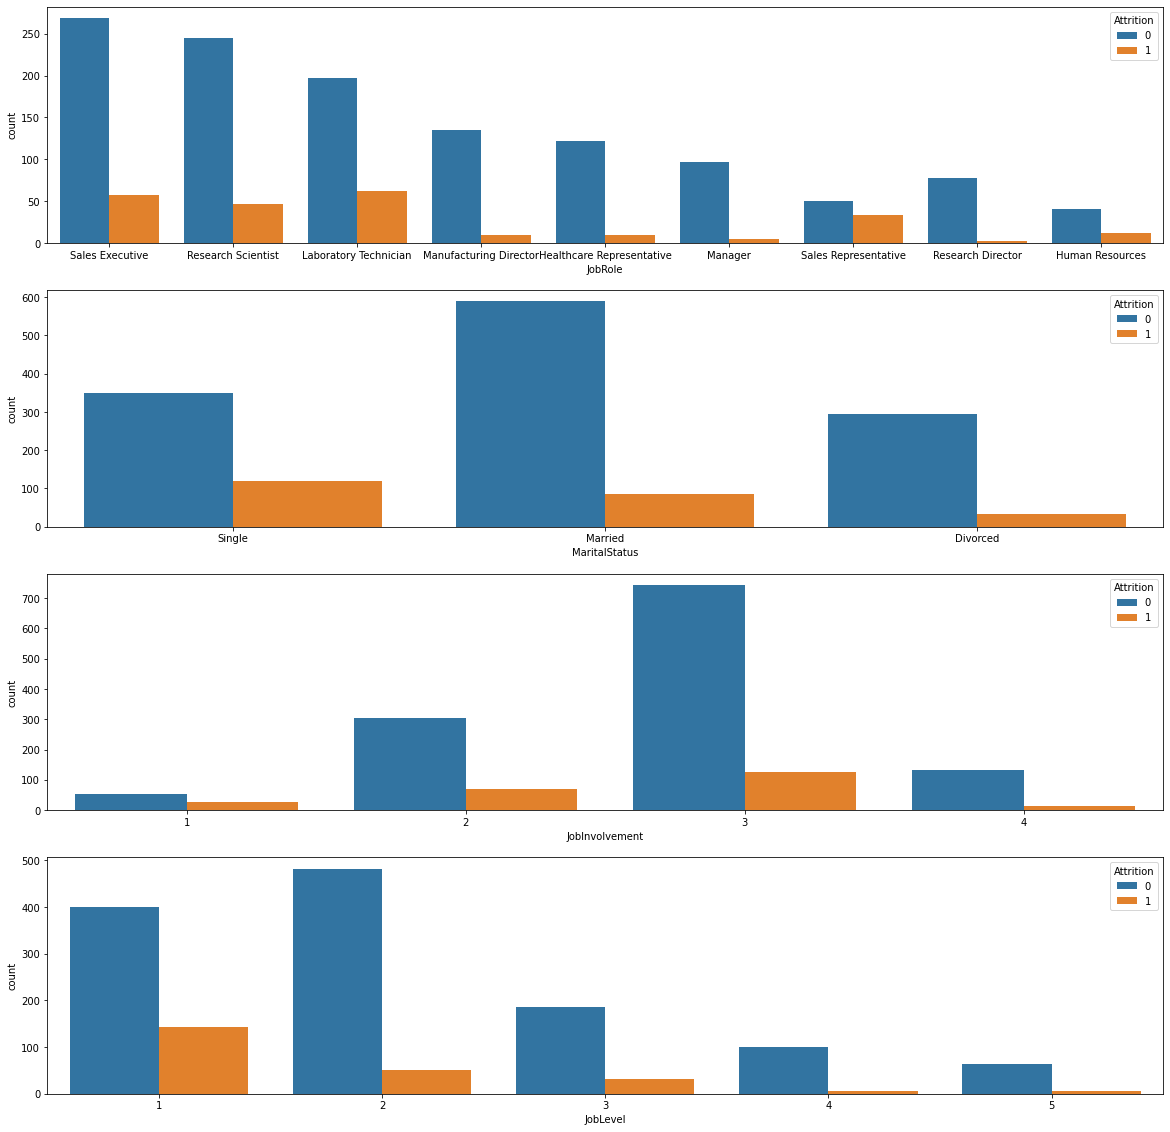

In [ ]:
# can maritial status , job level, role, involvement have a trend with the attrition rate
#Hypothesis 1: Single people will have higher leaving rate
# Hypothesis 2: People who are individual contributors will leave more often
# Hypothesis 3: people with low job involvement tend to leave
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

1. Employees on the post of managers and research directors are more likely to stay.
2. Lab technicians, sales reps are more prone to leave
3. Single people are more confident to leave as compared to married or divorce
4. People with low involvement leave more often
5. Individual contributors have more chances of leaving

Text(0.5, 0, 'Distance From Home')

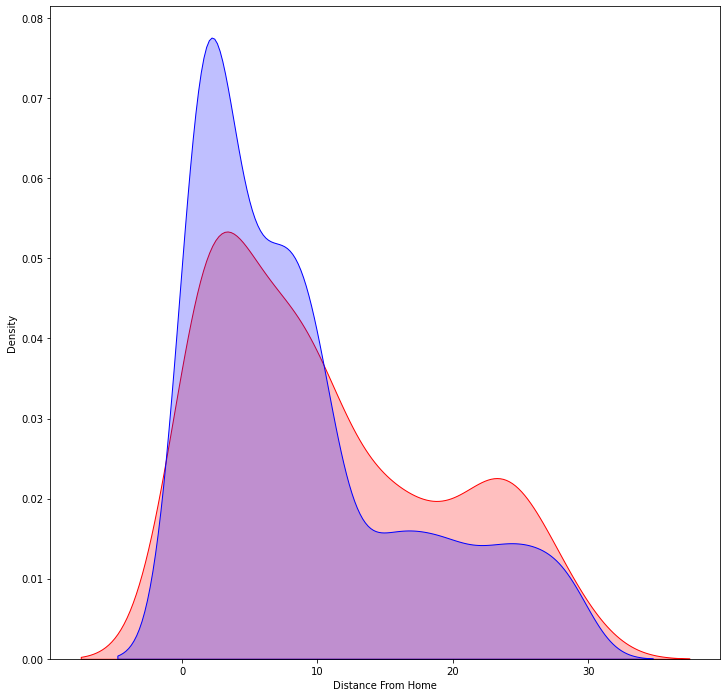

In [ ]:
# what extent of role does Distance plays in keeping an employee
plt.figure(figsize=(12,12))
sns.kdeplot(left_df['DistanceFromHome'],label='Left', shade=True,color='r')
sns.kdeplot(stayed_df['DistanceFromHome'],label='Stayed', shade=True,color='b')
plt.xlabel('Distance From Home')


With the increase in distance the area beneath left_df increased as compared to stayed_df, that indicates the attrition rate is directly proptional to the commute

Text(0.5, 0, 'Years with current manager')

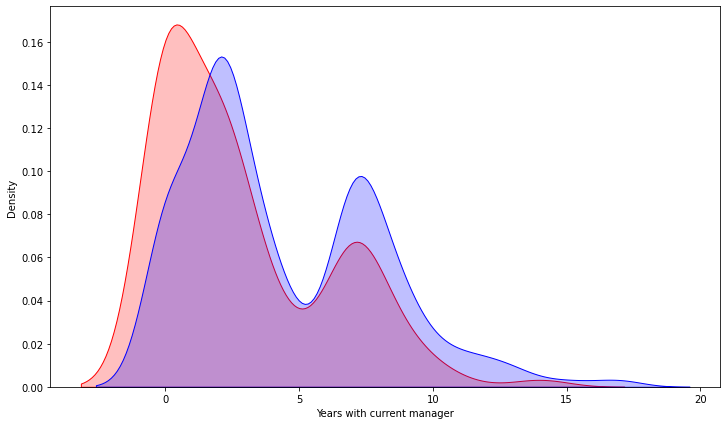

In [ ]:
# what extent of role does Manager plays in keeping an employee
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['YearsWithCurrManager'],label='Left',shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'],label='Stayed',shade=True, color='b')
plt.xlabel('Years with current manager')

Working with same manager with more years decreased the rate of employee attrition

Text(0.5, 0, 'Total Working Years')

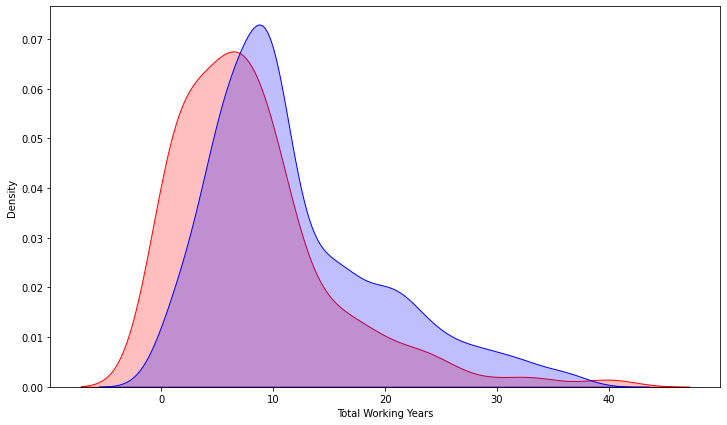

In [ ]:
# what extent of role does total working years plays in keeping an employee
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

A steap decline in attrition rate, with increment in working years

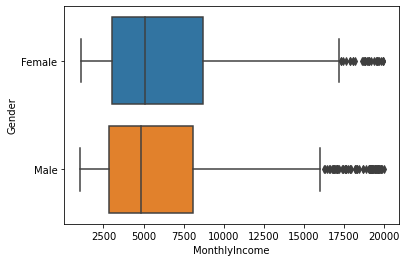

In [ ]:
# outliers
sns.boxplot(x='MonthlyIncome',y='Gender', data=employee_df)

On basis of gender, there is not much bias.

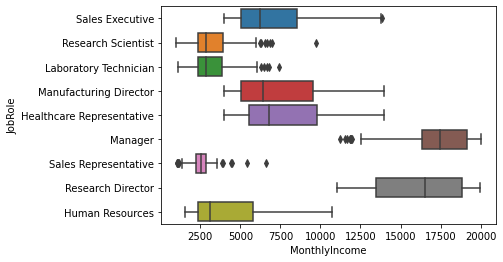

In [ ]:
sns.boxplot(x='MonthlyIncome',y='JobRole', data=employee_df)

1. Research scientist, lab technician,HR, sales rep have a low median salary 
-> that might explain there high attrition rate

2. Manager and research directors have highest salary median and also had low leaving rate




## Cleaning

In [ ]:
x_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
x_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
#encode categorical columns
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder()
x_cat= onehotencoder.fit_transform(x_cat).toarray()

In [ ]:
x_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
x_cat= pd.DataFrame(x_cat)

In [ ]:
x_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
x_numerical= employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
x_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
x_all = pd.concat([x_cat,x_numerical], axis=1)

In [ ]:
x_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
#scale the data before feeding to model
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
x= scale.fit_transform(x_all)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

All values now in the range of 0 to 1

In [ ]:
# target value
y= employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Train test split and modeling

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25)

In [ ]:
x_train.shape

(1102, 50)

In [ ]:
x_test.shape

(368, 50)

Models

1. Logistic Regresion
2. Randomforest
3. ANN

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model= LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))


Accuracy 91.03260869565217 %


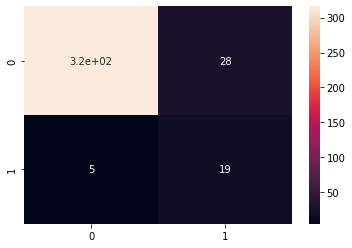

In [ ]:
cm= confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       344
           1       0.40      0.79      0.54        24

    accuracy                           0.91       368
   macro avg       0.69      0.86      0.74       368
weighted avg       0.95      0.91      0.92       368



In [ ]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred= model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))

Accuracy 88.04347826086956 %


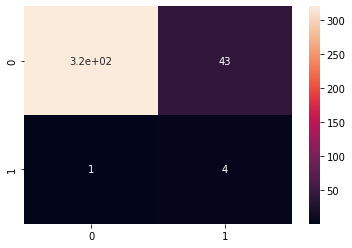

In [ ]:
cm= confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       363
           1       0.09      0.80      0.15         5

    accuracy                           0.88       368
   macro avg       0.54      0.84      0.54       368
weighted avg       0.98      0.88      0.93       368



In [ ]:
# ann
import tensorflow as tf

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500,activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))
model.add(tf.keras.layers.Dense(units=500,activation='relu'))

model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist= model.fit(x_train, y_train, epochs= 100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3285 - accuracy: 0.8784
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2937 - accuracy: 0.8902
Epoch 3/100
23/23 [==============================] - 0s 15ms/step - loss: 0.2903 - accuracy: 0.8857
Epoch 4/100
23/23 [==============================] - 0s 15ms/step - loss: 0.2594 - accuracy: 0.8956
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.2289 - accuracy: 0.9111
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.2451 - accuracy: 0.9047
Epoch 7/100
23/23 [==============================] - 0s 15ms/step - loss: 0.1840 - accuracy: 0.9347
Epoch 8/100
23/23 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.9374
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.1396 - accuracy: 0.9437
Epoch 10/100
23/23 [==============================] - 0s 13ms/step - loss: 0.1726 - accuracy: 0.9374

In [ ]:
y_pred= model.predict(x_test)
y_pred=(y_pred>0.5)

Text(0.5, 1.0, 'Model loss progress during training phase')

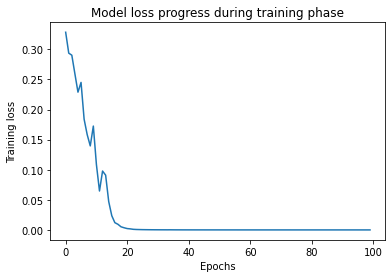

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')

plt.title('Model loss progress during training phase')

Text(0.5, 1.0, 'Model accuracy progress during training phase')

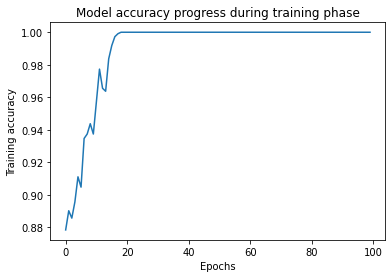

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')

plt.title('Model accuracy progress during training phase')

In [ ]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred,y_test)))

Accuracy 86.95652173913044 %


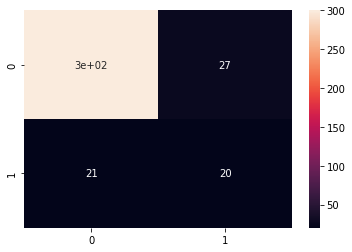

In [ ]:
cm= confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.93      0.92      0.93       327
        True       0.43      0.49      0.45        41

    accuracy                           0.87       368
   macro avg       0.68      0.70      0.69       368
weighted avg       0.88      0.87      0.87       368



Result:
Accuracy
1. Logistic Regression: 91%
2. Randomforest: 88%
3. ANN: 86%